## Описание проекта
Интернет-магазин "Стримчик" продает по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.  
Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные компании.

Задачи:
- посчитать суммарные продажи во всех регионах
- сколько игр выпускалось в разные годы, важны ли данные за все периоды
- как менялись продажи по платформам, за какой характерный срок появляются новые и исчезают старые платформы
- какие платформы лидируют по продажам, растут или падают
- "ящик с усами" по глобальным продажам игр в разбивке по платформам
- как влмяют на продажи внутри одной популярной платформы отзывы пользователей и критиков
- как это соотносится с продажами на других платформах
- какое распределение игр по жанрам, выделяются ли жанры с высокими и низкими продажами
- портрет пользователя каждого региона (топ-5 платформ по полярности, топ-5 популярных жанров, влияние рейтинга ESRB на продажи в регионе)
- проверить гипотезы:
    - средние пользовательские рейтинги платформ Xbox One и PC одинаковые
    - средние пользовательскте рейтинги жанров Action и Sports разные

Описание данных:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB. Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Общая информация о проекте

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
try:
    df = pd.read_csv('/datasets/games.csv') 
except:
    display('Ошибка при чтении файла') 

In [3]:
display (df.sample(3))
df.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
4910,BattleTanx: Global Assault,N64,1999.0,Action,0.31,0.07,0.0,0.00,NaN,NaN,NaN
777,Your Shape featuring Jenny McCarthy,Wii,2009.0,Sports,1.49,0.46,0.0,0.18,62.0,5.2,E
8078,Doctor Who: Return to Earth,Wii,2010.0,Adventure,0.00,0.16,0.0,0.02,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# видим пропуски в столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating
# строки с пропусками Name и Genre
df[pd.isnull(df['Name'])]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [5]:
# уникальные значения для Raiting
pd.unique(df['Rating'])

# EC - для младшего возраста, от 3 лет
# E - для всех, от 6 лет
# E10+- для всех от 10 лет
# T - подросткам, от 13 лет
# M - для вхрослых, от 17 лет
# AO - только для взрослых, от 18 лет
# RP - рейтинг ожидается
# K-A - устаревший рейтинг, сейас используется E

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [6]:
# смотрим дубликаты
df.loc[df.duplicated(subset=['Name', 'Platform', 'Year_of_Release'], keep=False)]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


In [7]:
#смотрим значение tbd в User_Score
pd.unique(df['User_Score'])
df.loc[df['User_Score'] == 'tbd']

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


### Список необходимых правок
- исходя из полученных данных, определим, какие данные привести к нужным типам и какие ошибки нужно исправить  

<code> Столбец        | Замена на тип         | Пропуски   | Примечание    
:--------------------:| :-------------:| :-------------:| -------------:
 Name                 |                | 2              |
 Year_of_Release      | int16          | 269            | заменим пропуски на 1979
 Genre                |                | 2              | 
 Critic_Score   	  | int8           | 8578           | заменим пропуски на 0
 User_Score           | float          | 6701           | заменим пропуски на 0, заменим tbd на 0
 Rating               |                | 6766           | замена пропусков на RP, замена рейтинга К-А
 

</code>

- заменим название столбцов, приведем их к нижнему регистру  
- заменим пропуски на 0 в Critic_Score и User_Score, а не на среднюю или медиану, так как на не известна причина отсутствия данных в этих столбцах и для избежания ненужных выбросов в данных
- заменим пропуски в Year_of_Release на 1979 (год предшествующий самому раннему значению релиза из нашей базы), для удобства дальнгейшего анализа
- основные причины появления NaN в Raiting - это выход игры до 1994 года (даты появляения первых рейтингов ESRB) и малые продажи (что может говорить о демо-версии игры и в связи с этим отстуствием выставленного рейтинга). поэтому меняем рейтинг на RP - рейтинг ожидается
- так же меняем рейтинг К-А на Е в связи с тем что это один и тот же рейтинг, просто с более старым обозначением
- в User_Score заменим значение tbd (To be determined - будет определено позже) на 0, так как рейтинг еще не определен
- имеются дубликаты в df, из полученых данных можно сделать вывод, что игра 'Madden NFL 13' скорее всего одна и та же игра, поэтому удалим дубликат (объеденять по выручке в Европе не будем, так как не знаем задублированные это данные или нет, да и для нашей выборки эти значения ничтожны)
- дубликаты NaN, судя по финансовым показателям, скорее всего разные игры, заменим на unknown.

In [8]:
#заменим NaN 
df['Year_of_Release'] = df['Year_of_Release'].fillna(1979)
df['Critic_Score'] = df['Critic_Score'].fillna(0)
df['User_Score'] = df['User_Score'].fillna(0)

In [9]:
# замена пропусков на RP, замена рейтинга К-А и оценки tbd
df['Rating'] = df['Rating'].fillna('RP')
df['Rating'].replace('K-A','E', inplace = True)
df['User_Score'].replace('tbd', 0 , inplace = True)

In [10]:
# приводим название столюцов к нижнему регистру
df.columns = df.columns.str.lower()

In [11]:
# переименовываем Nan в unknown
df['name'] = df['name'].fillna('unknown')
df['genre'] = df['genre'].fillna('unknown')

In [12]:
# удаляем дубликаты (keep = 'first' - оставляем первое значение)
df.drop_duplicates(subset=['name', 'platform', 'year_of_release', 'jp_sales'], keep = 'first' , inplace = True)

In [13]:
#меняем тип на int16 (целые числа в диапазоне от -32768 по 32767) и int8 (от -128 по 127)
df['year_of_release'] = df['year_of_release'].astype('int16') 
df['critic_score'] = df['critic_score'].astype('int8') 

#меняем object на float
df['user_score'] = pd.to_numeric(df['user_score'])

#экономия ресурсов от замены типа данных сотавила 0,1 Mb (около 7%)

### Суммарные продажи во всех регионах

In [14]:
df['sales'] = df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']

## Исследовательский анализ данных

### Выпуск игр в разные годы

% релизов до 2002 года: 18.41 %
% релизов после 2002 года: 81.59 %


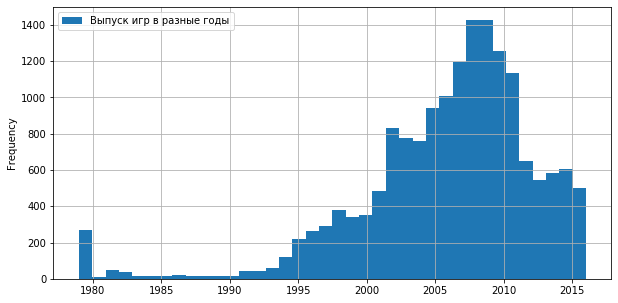

In [15]:
df['year_of_release'].plot(kind='hist', label='Выпуск игр в разные годы',
                       legend=True, bins=38, grid=True, figsize=(10,5))
year = 2002
above_year = 0
bellow_year = 0
for i in df['year_of_release']:
    if i<year:
        above_year += 1
    else:
        bellow_year += 1
print ('% релизов до', year, 'года:', round(above_year/(above_year+bellow_year)*100, 2), '%')
print ('% релизов после', year, 'года:', round(bellow_year/(above_year+bellow_year)*100, 2), '%')

- как видно из графика, более 80% всех игр было выпущено после 2002 года.  
- пик релизов приходится на 2008-2011 годы
- данные за 2016 год могут быть неполными
- таким образом данные по релизам за 2002-2015 года стремяться к нормальному распределению

### Продажи по платформам

In [16]:
# считаем продажи по платформам за весь период
sales_platform = df.pivot_table(index=['platform'], values=['sales'], aggfunc=[sum])

# % отношение от всех продаж
sales_platform['%_sales'] = round (sales_platform/sales_platform.sum()*100, 2)

#Топ-10 платформ по продажам:
top_plathorm_sales = sales_platform.sort_values(('sum', 'sales'), ascending=False).head(10)

display('Топ-10 платформ по продажам:')
display (top_plathorm_sales)

'Топ-10 платформ по продажам:'

,sum,%_sales
,sales,
platform,,
PS2,1255.77,14.08
X360,971.42,10.90
PS3,939.64,10.54
Wii,907.51,10.18
DS,806.12,9.04
PS,730.86,8.20
GBA,317.85,3.57
PS4,314.14,3.52


platform
DS      AxesSubplot(0.125,0.125;0.775x0.755)
GBA     AxesSubplot(0.125,0.125;0.775x0.755)
PC      AxesSubplot(0.125,0.125;0.775x0.755)
PS      AxesSubplot(0.125,0.125;0.775x0.755)
PS2     AxesSubplot(0.125,0.125;0.775x0.755)
PS3     AxesSubplot(0.125,0.125;0.775x0.755)
PS4     AxesSubplot(0.125,0.125;0.775x0.755)
PSP     AxesSubplot(0.125,0.125;0.775x0.755)
Wii     AxesSubplot(0.125,0.125;0.775x0.755)
X360    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

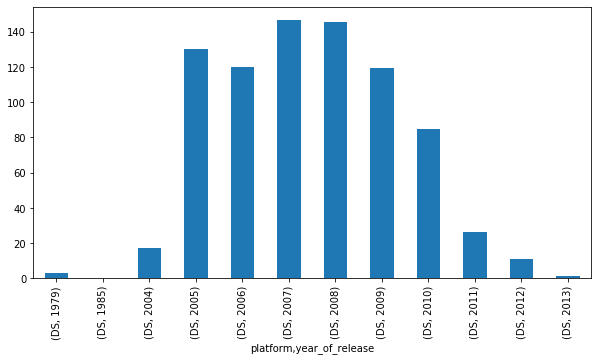

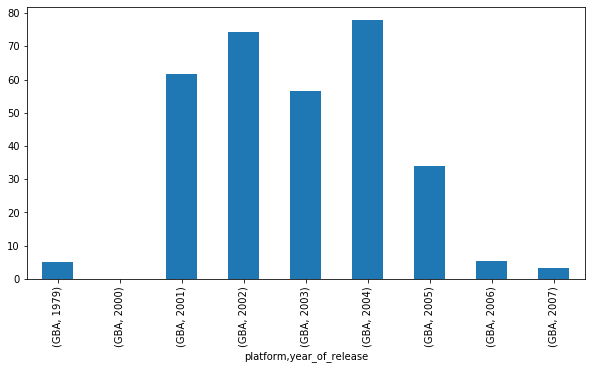

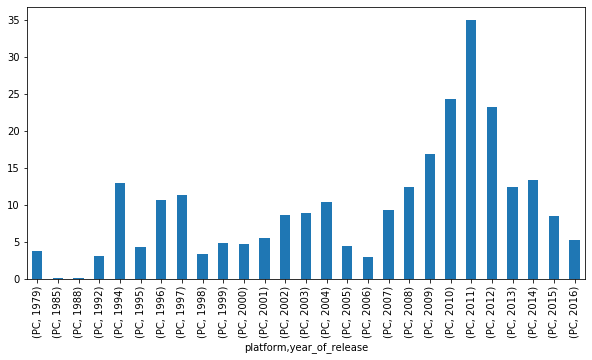

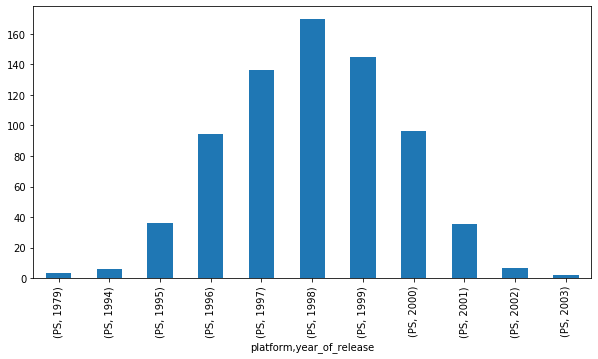

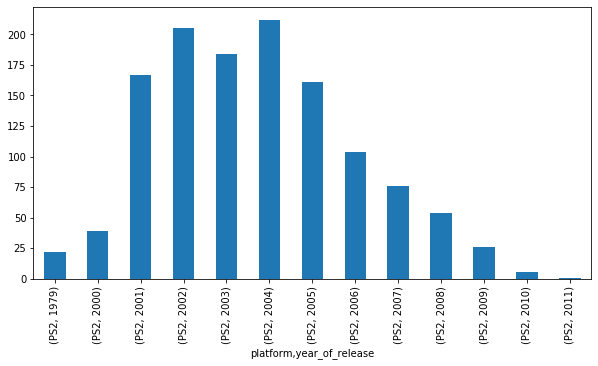

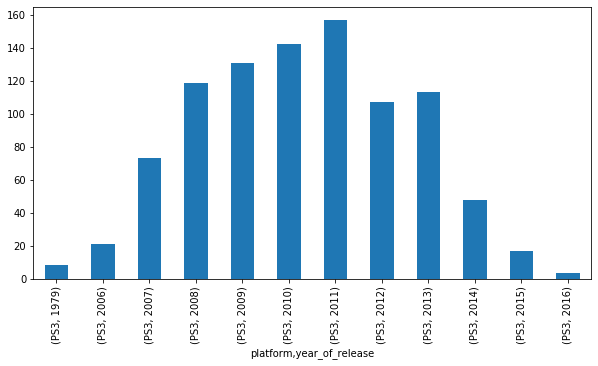

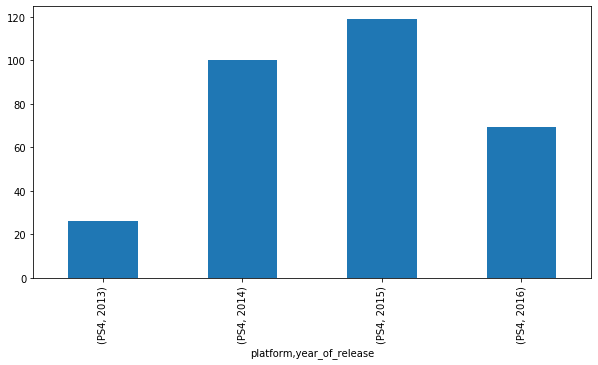

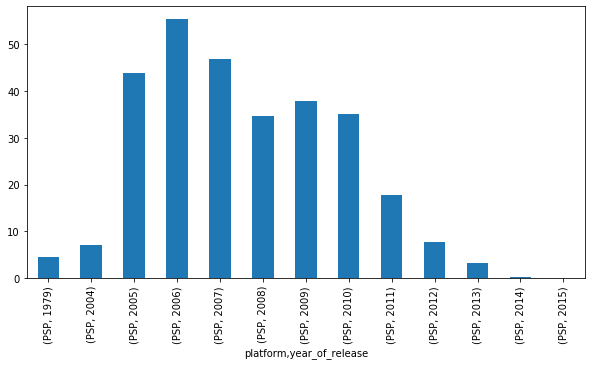

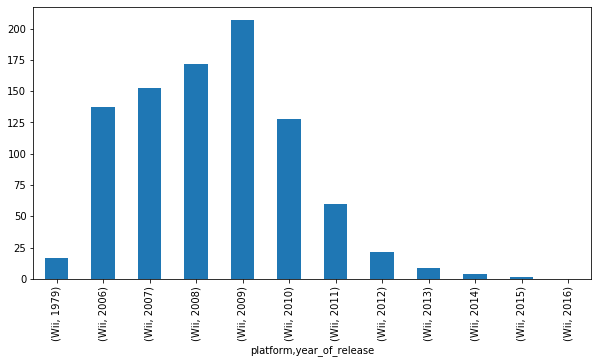

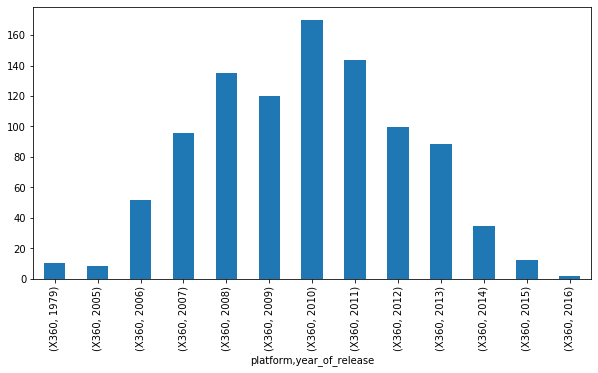

In [17]:
import warnings
warnings.filterwarnings("ignore")


# делаем выборку из основной базы, только топ-10 платформ по продажам
top_plathorm_sales = top_plathorm_sales.reset_index ()
top_plathorm_sales_years = top_plathorm_sales.merge(df, left_on='platform', right_on='platform', how='inner')

# делаем разбивку по продажам по каждой платформе по годам
top_plathorm_sales_years = top_plathorm_sales_years.pivot_table(index=['platform', 'year_of_release'],
                                                                values=['sales'], aggfunc=[sum])

# строим каждый график по платформе отдельно, 
# так как на данном этапе у нас стоит задача выявить закономерность в жизнедеятельности платформ,
# а не сравнить их показатели
# тем более на одном графике они все сольются

top_plathorm_sales_years.groupby('platform').plot(kind='bar', figsize=(10,5), legend=False)


In [18]:
# расчет продолжительности жизни платформ
df1=df[df['year_of_release']>1979]
life = df1.pivot_table(index=['platform'], values=['year_of_release'], aggfunc=[min, max])
life['life'] = life['max', 'year_of_release'] - life['min', 'year_of_release']
life.describe()

,min,max,life
,year_of_release,year_of_release,
count,31.000000,31.000000,31.000000
mean,1997.645161,2005.258065,7.612903
std,9.094131,9.273503,6.998464
min,1980.000000,1989.000000,0.000000
25%,1992.500000,1996.000000,3.000000
50%,1996.000000,2007.000000,6.000000
75%,2004.500000,2016.000000,10.000000
max,2013.000000,2016.000000,31.000000


- как видно из графиков , срок активной "жизнедеятельности" платформы составляет 6-8 лет, после чего ее сменяет другая (как правило того же производителя, например как в случае с линейкой PS)
- пики продаж приходятся на 4-5 год с момента старта продаж игр для платформы
- из общей картины выбиваются PS4 и PC. PS4 - по причине неполных данных, на момент формирования базы, прошло неполных 4 года с момента ее появляения. PC  - по причинеи принципиальной разнице платформы от прочих, т.к. это персональные компьютеры, а остальные платформы это в основном консоли.
- на топ-5 платформ приходиться 55% всех продаж, на топ-10 - более 75%.
- исходя из графиков топ-10 платформ по продажам, можно порекомендовать на 2017г сосредоточить продажи на PS4 и PC. PS4 как раз входит в период "пики продаж", PC - как наиболее стабильная платформа из-за своей специфики

### Потенциально прибыльные платформы

определим актуальный период, исходя из активной "жизнедеятельности" платформы в 6-8 лет, пика продаж через 3-4 года после старта продаж и неполных данных за 2016г, - 5 лет (период 2012-2016г). Берем за основу половину активной фазы жизнедеятельности - либо мы увидим рост, либо падение за эти года. На основании анализа данного периода будем строить прогноз на 2017 г. по потенциально прибыльным платформам

In [19]:
# выборка за актуальный период (игры выходили после 2011)
actual=df[df['year_of_release'] > 2011]

# смотрим выходы игр по годам
actual_sort=pd.crosstab(actual['year_of_release'], actual['platform'], values=actual['sales'], aggfunc=sum)

actual_sort

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51.36,11.01,23.22,107.35,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


как видно из полученой выборки, на Nintendo DS не выпускались игры после 2013г, а на PlayStation Portable в 2016 году невышло ни одной игры и продажи за 2015 год составили всего 120 тыс.копий. Поэтому исключим их из нашего анализа.   
Таким образом для анализа у на с остаются платформы 3DC, PC, PS3, PS4, PSV, Wii, WiiU, X360, XOne

Text(0, 0.5, 'Продажи, млн.копий')

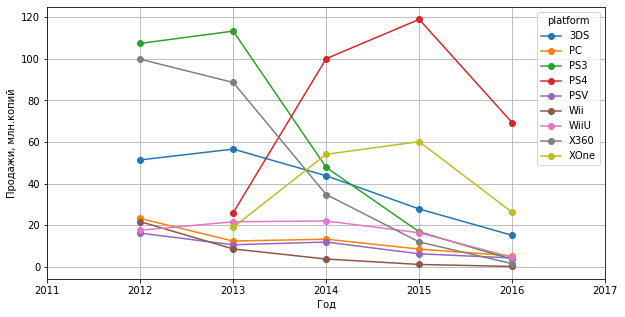

In [20]:
# удаляем ненужные для анализа столбцы
actual_sort.drop(['DS', 'PSP'], axis=1, inplace=True)

# частотное сравнение
actual_sort.plot(style='o-', grid=True, figsize=(10,5), xlim=(2011, 2017))
plt.xlabel('Год')
plt.ylabel('Продажи, млн.копий')


принимая во внимание, что за 2016 год у нас могут быть неполные данные и исходя из вышеприведенной информации, можно сделать вывод, что потенциально прибыльные платформы в 2017 году, это: 
- среди консолей PS4 и XOne (наблюдается рост последние несколько лет, пика еще не достигли)
- среди портативных консолей PSV (идет спад спроса, но не резкий, да и других портативных консолей в топе нет)
- и PC (волнообразный постоянный спрос)

### Диаграмма размаха по глобальным продажам игр в разбивке по платформам

Text(0, 0.5, 'Продажи, млн.копий')

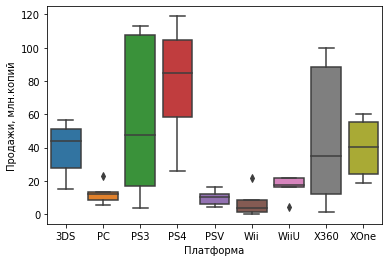

In [21]:
sns.boxplot(data=actual_sort)
sns.set(rc={'figure.figsize':(15,10)})
plt.xlabel('Платформа')
plt.ylabel('Продажи, млн.копий')


ближе всего к нормальному распределению платформы PS4 и XOne.   
у X360 и PS3 преобладают значения больше медианого. Как видно из предыдущих графиков, это связано с резким падением продаж после 2013года.  
выбросов немного, у PC и Wii это связано с очень большими продажами в 2012 году по сравнению с выборкой, у WiiU - с резким падением продаж в 2016 (так как данные за 2016 могут быть неполными, с корректировкой информации продажи, этот выброс может исчезнуть)

### Влияние на продажи отзывов пользователей и критиков
возьмем за основу для анализа платформу XOne (берем ее, так как ее данные по продажам наиболее приблежены к нормальному распределению)

Text(0.5, 0, 'Продажи, млн.копий')

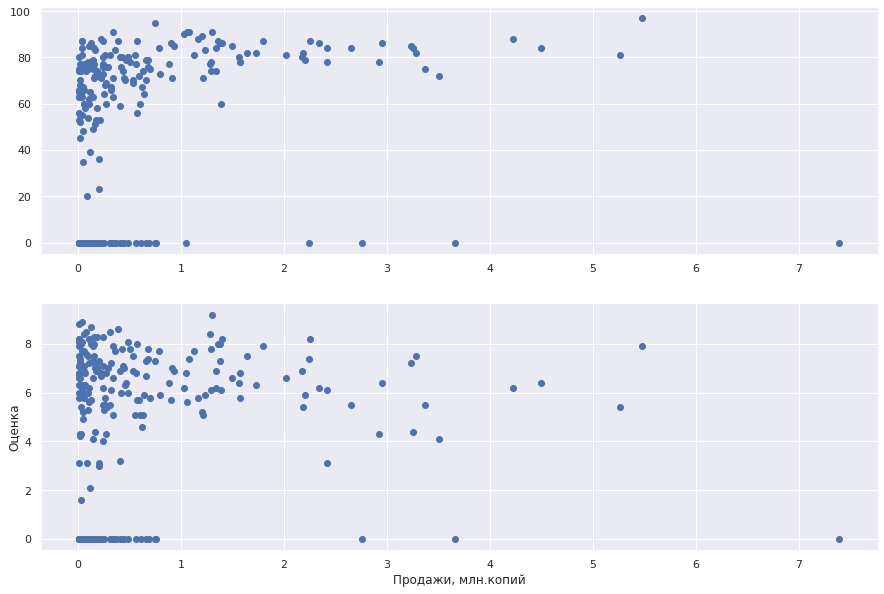

In [22]:
fig_scatter,(critic, user) = plt.subplots(2,1, figsize = (15,10))
critic.scatter(y='critic_score', x='sales', data=df.query('platform == "XOne"'))
user.scatter(y='user_score', x='sales', data=df.query('platform == "XOne"'))  
plt.ylabel('Оценка')
plt.xlabel('Продажи, млн.копий')

In [23]:
# корреляция между отзывами и продажами
print ('Xbox One')
print('Корреляция между отзывами критиков и продажами:',
      df.query('platform == "XOne"')['critic_score'].corr(df.query('platform == "XOne"')['sales']))
print('Корреляция между отзывами пользователей и продажами:',
      df.query('platform == "XOne"')['user_score'].corr(df.query('platform == "XOne"')['sales']))
print('Корреляция между отзывами пользователей и критиками:',
      df.query('platform == "XOne"')['user_score'].corr(df.query('platform == "XOne"')['critic_score']))


Xbox One
Корреляция между отзывами критиков и продажами: 0.2748391874944539
Корреляция между отзывами пользователей и продажами: 0.11656261405851895
Корреляция между отзывами пользователей и критиками: 0.7741525521752851


In [24]:
# уберем из наших данных выпадающий значения ввиде 0 
df_critic=df[df['critic_score'] > 0]
df_user=df[df['user_score'] > 0]

print('Корреляция между отзывами критиков и продажами без выпадающих значений:',
      df_critic.query('platform == "XOne"')['critic_score'].corr(df_critic.query('platform == "XOne"')['sales']))
print('Корреляция между отзывами пользователей и продажами без выпадающих значений:',
      df_user.query('platform == "XOne"')['user_score'].corr(df_user.query('platform == "XOne"')['sales']))
print('Корреляция между отзывами пользователей и критиками без выпадающих значений:',
      df_user.query('platform == "XOne"')['user_score'].corr(df_critic.query('platform == "XOne"')['critic_score']))

Корреляция между отзывами критиков и продажами без выпадающих значений: 0.4169983280084017
Корреляция между отзывами пользователей и продажами без выпадающих значений: -0.06892505328279414
Корреляция между отзывами пользователей и критиками без выпадающих значений: 0.4724621124165802


Text(0.5, 0, 'Продажи, млн.копий')

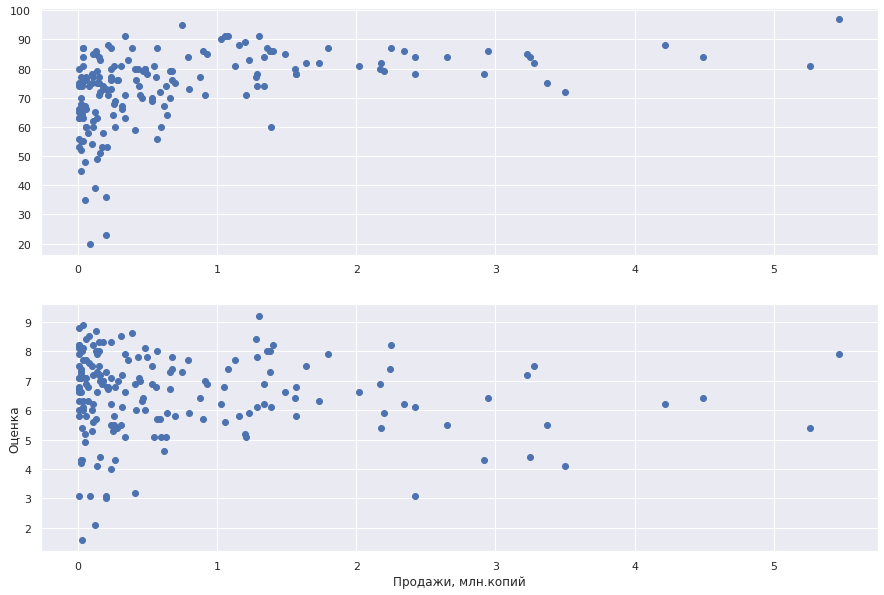

In [25]:
fig_scatter,(critic, user) = plt.subplots(2,1, figsize = (15,10))
critic.scatter(y='critic_score', x='sales', data=df_critic.query('platform == "XOne"'))
user.scatter(y='user_score', x='sales', data=df_user.query('platform == "XOne"'))  
plt.ylabel('Оценка')
plt.xlabel('Продажи, млн.копий')

С одной стороны нет явного прямого влияния отзывов критиков и пользователей на продажи. Однако если мы уберем из наших данных результаты где не было оставленно ни каких оценок играм, мы увидим, что корреляция между отзывами критиков и продажами резко возрастает, а корреляция по оценке пользователей, наоборот падает и даже становиться отрицательной (чем хуже отзыв тем больше продажи). Таким образом можно сделать вывод, что отзывы критиков достаточно сильно влияют на результаты продаж игр, а отзывы пользователей имеют низкую корреляцию.

In [26]:
# сравним корреляции еще по нескольким платформам
print('Xbox 360')
print('Корреляция между отзывами критиков и продажами без выпадающих значений:',
      df_critic.query('platform == "X360"')['critic_score'].corr(df_critic.query('platform == "X360"')['sales']))
print('Корреляция между отзывами пользователей и продажами без выпадающих значений:',
      df_user.query('platform == "X360"')['user_score'].corr(df_user.query('platform == "X360"')['sales']))
print('')
print('PlayStation 4')
print('Корреляция между отзывами критиков и продажами без выпадающих значений:',
      df_critic.query('platform == "PS4"')['critic_score'].corr(df_critic.query('platform == "PS4"')['sales']))
print('Корреляция между отзывами пользователей и продажами без выпадающих значений:',
      df_user.query('platform == "PS4"')['user_score'].corr(df_user.query('platform == "PS4"')['sales']))
print('')
print('PlayStation 3')
print('Корреляция между отзывами критиков и продажами без выпадающих значений:',
      df_critic.query('platform == "PS3"')['critic_score'].corr(df_critic.query('platform == "PS3"')['sales']))
print('Корреляция между отзывами пользователей и продажами без выпадающих значений:',
      df_user.query('platform == "PS3"')['user_score'].corr(df_user.query('platform == "PS3"')['sales']))
print('')
print('Nintendo 3DS')
print('Корреляция между отзывами критиков и продажами без выпадающих значений:',
      df_critic.query('platform == "3DS"')['critic_score'].corr(df_critic.query('platform == "3DS"')['sales']))
print('Корреляция между отзывами пользователей и продажами без выпадающих значений:',
      df_user.query('platform == "3DS"')['user_score'].corr(df_user.query('platform == "3DS"')['sales']))
print('')
print('Nintendo Wii U')
print('Корреляция между отзывами критиков и продажами без выпадающих значений:',
      df_critic.query('platform == "WiiU"')['critic_score'].corr(df_critic.query('platform == "WiiU"')['sales']))
print('Корреляция между отзывами пользователей и продажами без выпадающих значений:',
      df_user.query('platform == "WiiU"')['user_score'].corr(df_user.query('platform == "WiiU"')['sales']))
print('')
print('Personal Computer')
print('Корреляция между отзывами критиков и продажами без выпадающих значений:',
      df_critic.query('platform == "PC"')['critic_score'].corr(df_critic.query('platform == "PC"')['sales']))
print('Корреляция между отзывами пользователей и продажами без выпадающих значений:',
      df_user.query('platform == "PC"')['user_score'].corr(df_user.query('platform == "PC"')['sales']))


Xbox 360
Корреляция между отзывами критиков и продажами без выпадающих значений: 0.3937358653072588
Корреляция между отзывами пользователей и продажами без выпадающих значений: 0.11445882978454185

PlayStation 4
Корреляция между отзывами критиков и продажами без выпадающих значений: 0.40656790206178095
Корреляция между отзывами пользователей и продажами без выпадающих значений: -0.031957110204556424

PlayStation 3
Корреляция между отзывами критиков и продажами без выпадающих значений: 0.43337268693947584
Корреляция между отзывами пользователей и продажами без выпадающих значений: 0.12620720462052884

Nintendo 3DS
Корреляция между отзывами критиков и продажами без выпадающих значений: 0.3494009303924131
Корреляция между отзывами пользователей и продажами без выпадающих значений: 0.22480798039571082

Nintendo Wii U
Корреляция между отзывами критиков и продажами без выпадающих значений: 0.34837976012017485
Корреляция между отзывами пользователей и продажами без выпадающих значений: 0.4002

- корреляция отзывов с продажами по другим платформам подтверждает, что имеется зависимость от отзыва критиков и продажами.
- при этом если значения для консолей достаточно близки, влияние критиков на продажи игр на PC намного ниже.
- так же выявляется особенность по производителю Nintenda - на продажа игр для их платформ большое влияение имеет отзывы пользователей, по некоторым платформам они даже имеют большее влияние чем отзывы критиков

### Прибыльность жанров

Text(0.5, 0, 'Жанр')

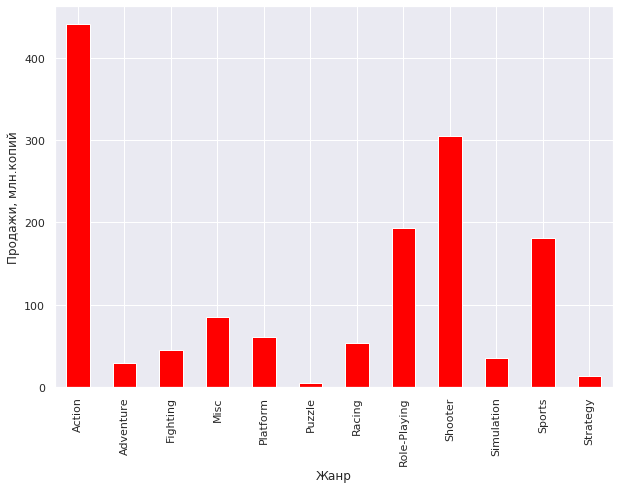

In [27]:
actual.pivot_table(index=['genre'], values=['sales'],
                   aggfunc=[sum]).plot(kind='bar', legend=False, colormap='autumn', figsize = (10,7))
plt.ylabel('Продажи, млн.копий')
plt.xlabel('Жанр')

Text(0.5, 0, 'Жанр')

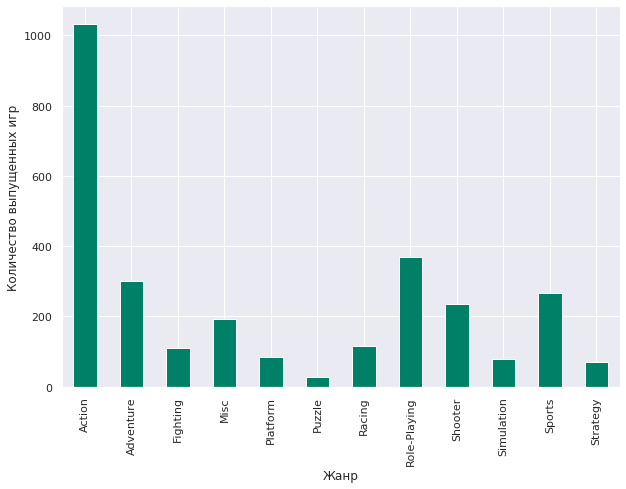

In [28]:
#genre_analysis_pivot_table = actual_frame.groupby('genre').agg({'name':'count','total_sales':['median','sum']})

actual.groupby('genre').agg({'name':'count'}).plot(kind='bar', legend=False, colormap='summer', figsize = (10,7))
plt.ylabel('Количество выпущенных игр')
plt.xlabel('Жанр')

- лидирующие позиции по продажам в последние годы занимает жанр Action
- с большим отрывом от него (окло 31%) идет жанр Shooter
- жанры RolePlay и Sports по продажам примерно одинаковые и занимают 3-место
- все остальные жанры продаются слабо. Общая доля продаж прочих жанров окло 23%
- объем продаж достигается в осноном за счет большого количества выпущенных игр, однако есть и исключения, например не смотря на большое кол-во выпущенных игр жанра Adventure, его доля продаж одна из самых низких

### Выводы
- более 80% всех игр было выпущено после 2002 года
- пик продаж приходится на 2008-2011 годы
- срок активной "жизнедеятельности" платформы составляет 6-8 лет, после чего ее сменяет другая 
- пики продаж приходятся на 4-5 год с момента старта продаж игр для платформы
- из общей картины выбиваются PC - по причине отличия платформы от прочих, т.к. это персональные компьютеры, а остальные платформы это в основном консоли.
- на топ-5 консолей приходиться 55% всех продаж, на топ-10 - более 75%.
- лидирующие позиции по продажам в последние годы занимает жанр Action, с большим отрывом от него идет жанр Shooter, жанры RolePlay и Sports по продажам примерно одинаковые и занимают 3-место
- все остальные жанры продаются слабо. Общая доля продаж прочих жанров окло 23%
- принимая во внимание, что за 2016 год у нас могут быть неполные данные и исходя из вышеприведенной информации, можно сделать вывод, что потенциально прибыльные платформы в 2017 году, это:
   - среди консолей PS4 и XOne (наблюдается рост последние несколько лет, пика еще не достигли)
   - среди портативных консолей PSV (идет спад спроса, но не резкий)
   - PC (волнообразный постоянный спрос)
- в ассортиментной политике стоит сделать упор на продаваемые жанры: Action, Shooter, RolePlay и Sports

## Портрет пользователя по регионам

### ТОП-5 платформ

In [29]:
# продажи по регионам по платформам с 2012г
region_sale = actual.pivot_table(index=['platform'], values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'],aggfunc=[sum])

In [30]:
eu_sales=region_sale [('sum', 'eu_sales')].sort_values(ascending = False).head()
jp_sales=region_sale [('sum', 'jp_sales')].sort_values(ascending = False).head()
na_sales=region_sale [('sum', 'na_sales')].sort_values(ascending = False).head()
other_sales=region_sale [('sum', 'other_sales')].sort_values(ascending = False).head()

print(eu_sales)
print(jp_sales)
print(na_sales)
print(other_sales)

platform
PS4     141.09
PS3     106.85
X360     74.52
XOne     51.59
3DS      42.64
Name: (sum, eu_sales), dtype: float64
platform
3DS     87.79
PS3     35.29
PSV     21.04
PS4     15.96
WiiU    13.01
Name: (sum, jp_sales), dtype: float64
platform
X360    140.05
PS4     108.74
PS3     103.38
XOne     93.12
3DS      55.31
Name: (sum, na_sales), dtype: float64
platform
PS4     48.35
PS3     43.26
X360    20.40
XOne    14.27
3DS      8.87
Name: (sum, other_sales), dtype: float64


Text(0.05, 0.5, 'EU Европа')

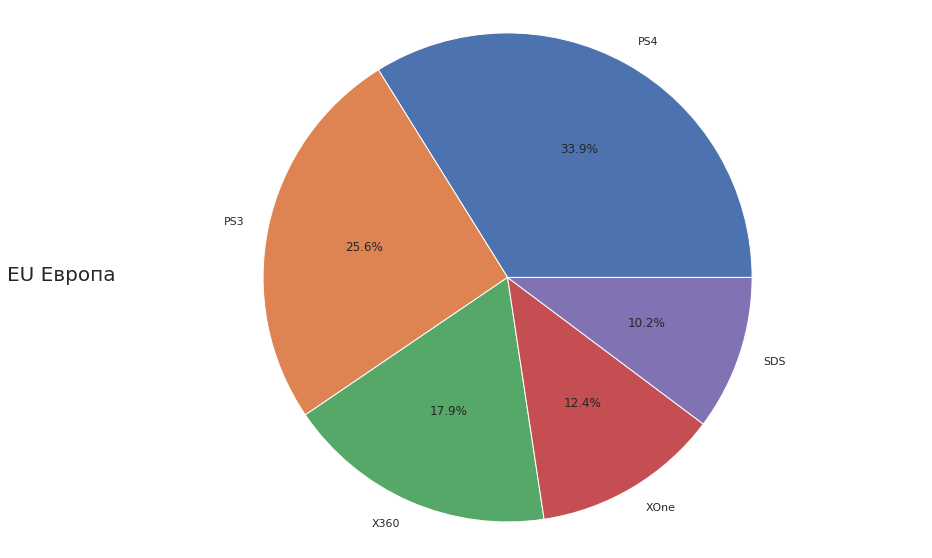

In [31]:
#EU
fig1, ax1 = plt.subplots()
labels_eu = 'PS4', 'PS3', 'X360', 'XOne', 'SDS'
ax1.pie(eu_sales, labels=labels_eu, autopct='%1.1f%%')
ax1.axis('equal') 
plt.figtext(0.05, 0.5, 'EU Европа', fontsize=20)

Text(0.05, 0.5, 'JP Япония')

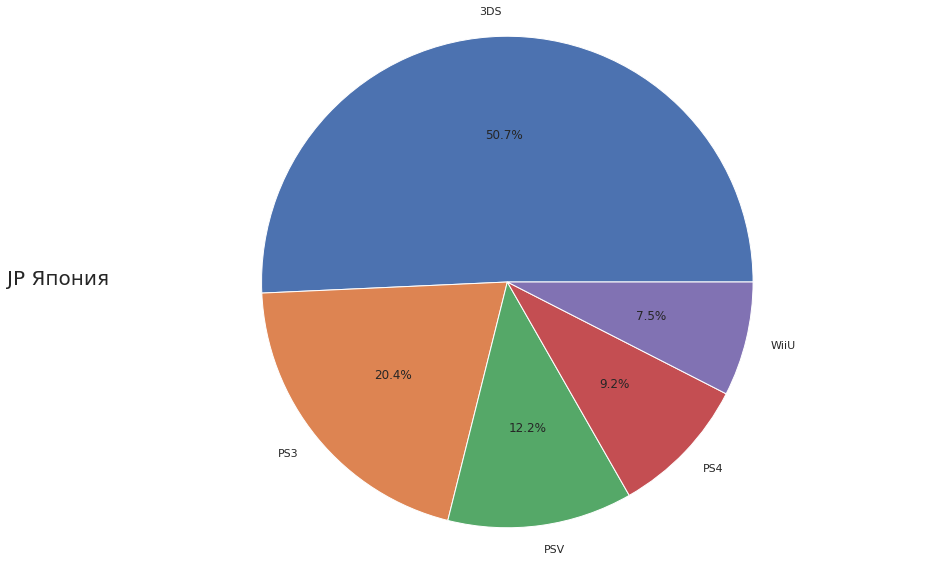

In [32]:
#JP
fig1, ax1 = plt.subplots()
labels_jp = '3DS', 'PS3', 'PSV', 'PS4', 'WiiU'
ax1.pie(jp_sales, labels=labels_jp, autopct='%1.1f%%')
ax1.axis('equal') 
plt.figtext(0.05, 0.5, 'JP Япония', fontsize=20)

Text(0.05, 0.5, 'NA Сев.Америка')

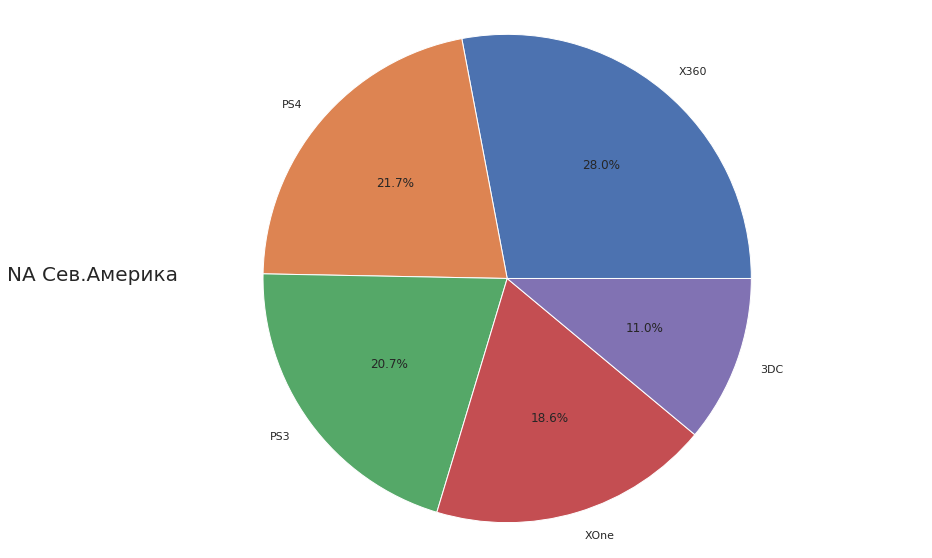

In [33]:
#NA
fig1, ax1 = plt.subplots()
labels_na = 'X360', 'PS4', 'PS3', 'XOne', '3DC'
ax1.pie(na_sales, labels=labels_na, autopct='%1.1f%%')
ax1.axis('equal') 
plt.figtext(0.05, 0.5, 'NA Сев.Америка', fontsize=20)

Text(0.05, 0.5, 'Прочие')

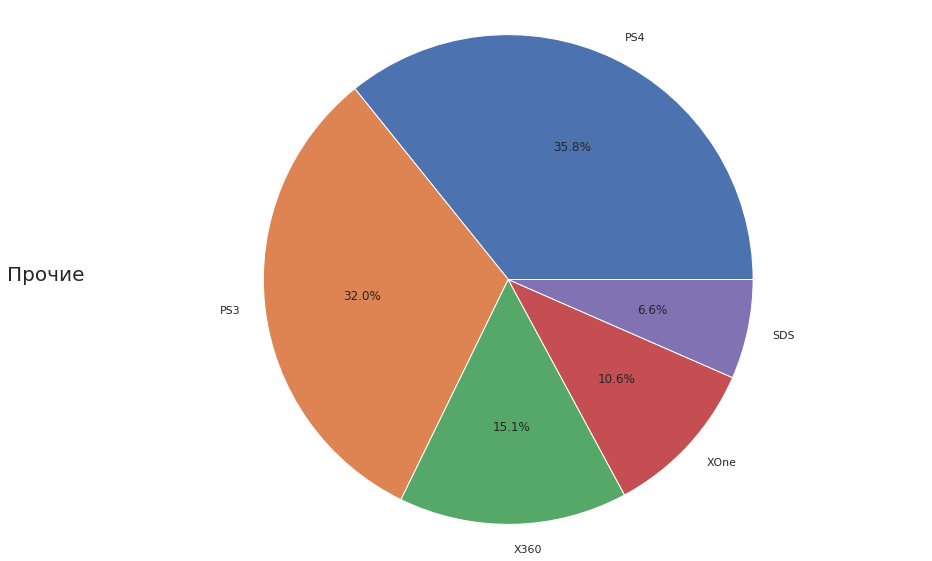

In [34]:
#Other
fig1, ax1 = plt.subplots()
labels_other = 'PS4', 'PS3', 'X360', 'XOne', 'SDS'
ax1.pie(other_sales, labels=labels_other, autopct='%1.1f%%')
ax1.axis('equal') 
plt.figtext(0.05, 0.5, 'Прочие', fontsize=20)

- Доли в продажах в Топ-5 по регионам по производителям:
    - Европа: Sony 59,5%, Microsoft - 30,3%, Nintendo - 10,2%
    - Япония: Sony 41,8%, Nintendo - 58,2%    
    - Сев.Америка: Sony 42,4%, Microsoft - 46,6%, Nintendo - 11,0%
    - Прочие: Sony 67.8%, Microsoft - 25.7%, Nintendo - 6.6%
- Высокая доля 3DC в JP и X360, XOne в NA объясняется страной происхождения платформы
- обращает на себя внимание провал продаж Xbox в Японии
- так же в Японии в топ-5 входит PlayStation Vita - единственная портативная приставка
- в общем в мире лидирует продукция Sony (PS3 и PS4)

### ТОП-5 жанров

In [35]:
# продажи по регионам по жанрам с 2012г
genre_sale = actual.pivot_table(index=['genre'], values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'],aggfunc=[sum])

In [36]:
eu_genre=genre_sale [('sum', 'eu_sales')].sort_values(ascending = False).head()
jp_genre=genre_sale [('sum', 'jp_sales')].sort_values(ascending = False).head()
na_genre=genre_sale [('sum', 'na_sales')].sort_values(ascending = False).head()
other_genre=genre_sale [('sum', 'other_sales')].sort_values(ascending = False).head()

Text(0.05, 0.5, 'EU Европа')

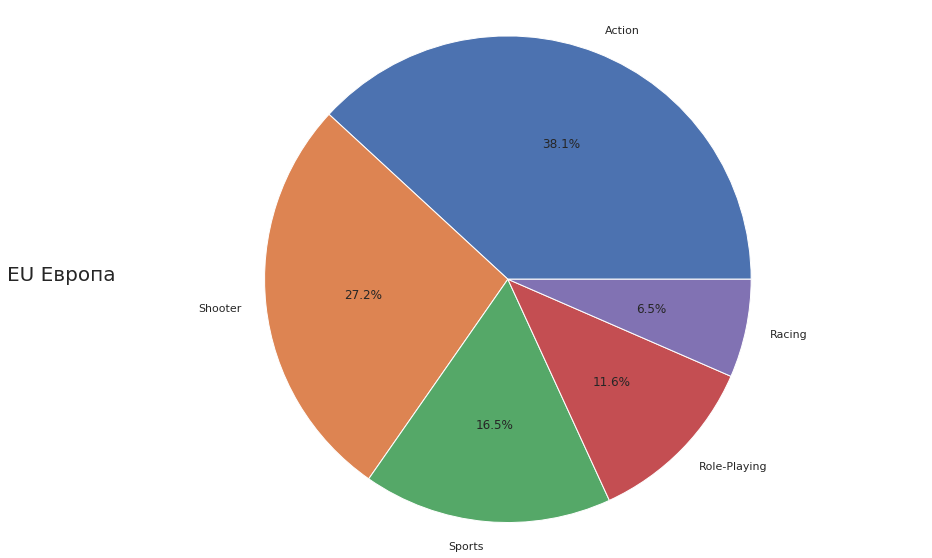

In [37]:
#EU
fig1, ax1 = plt.subplots()
labels_eu = 'Action', 'Shooter', 'Sports', 'Role-Playing', 'Racing'
ax1.pie(eu_genre, labels=labels_eu, autopct='%1.1f%%')
ax1.axis('equal') 
plt.figtext(0.05, 0.5, 'EU Европа', fontsize=20)

Text(0.05, 0.5, 'JP Япония')

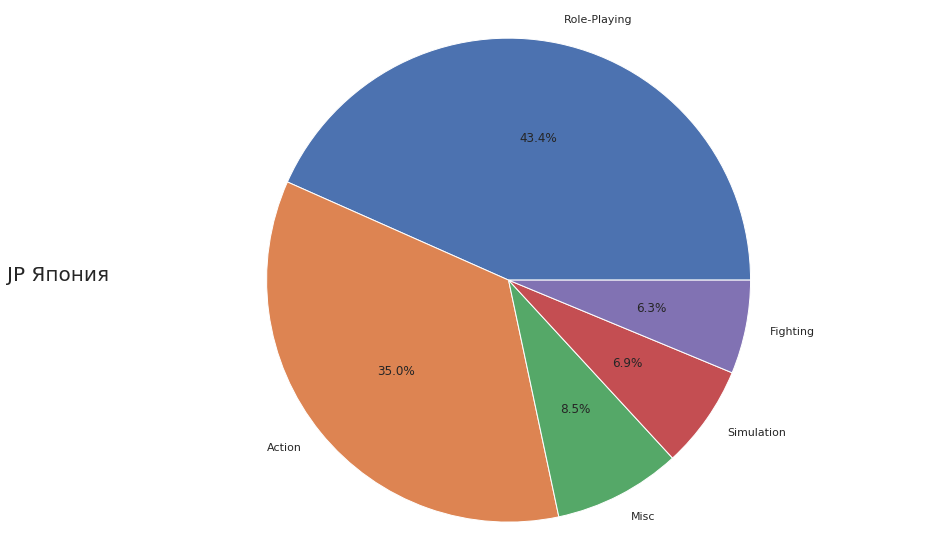

In [38]:
#JP
fig1, ax1 = plt.subplots()
labels_jp = 'Role-Playing', 'Action', 'Misc', 'Simulation', 'Fighting'
ax1.pie(jp_genre, labels=labels_jp, autopct='%1.1f%%')
ax1.axis('equal') 
plt.figtext(0.05, 0.5, 'JP Япония', fontsize=20)

Text(0.05, 0.5, 'NA Сев.Америка')

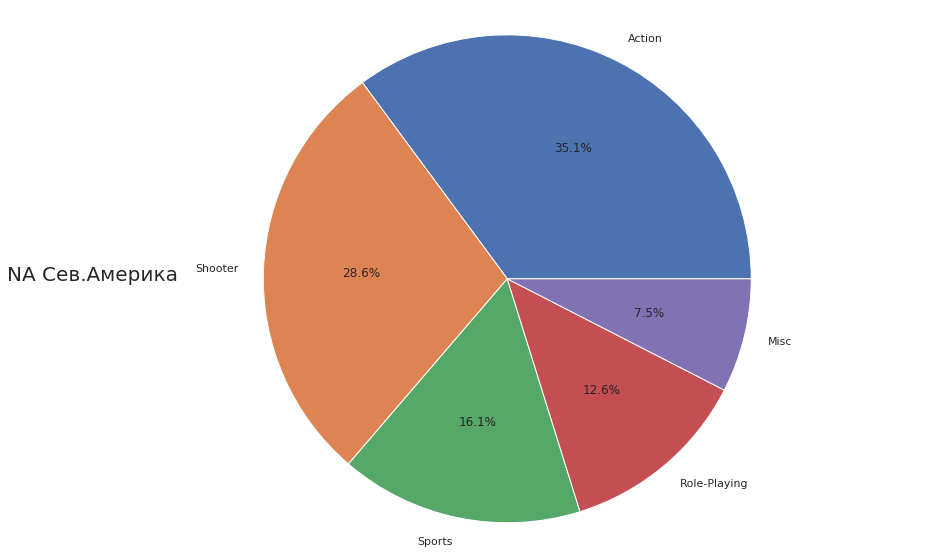

In [39]:
#NA
fig1, ax1 = plt.subplots()
labels_na = 'Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc'
ax1.pie(na_genre, labels=labels_na, autopct='%1.1f%%')
ax1.axis('equal') 
plt.figtext(0.05, 0.5, 'NA Сев.Америка', fontsize=20)

Text(0.05, 0.5, 'Прочие')

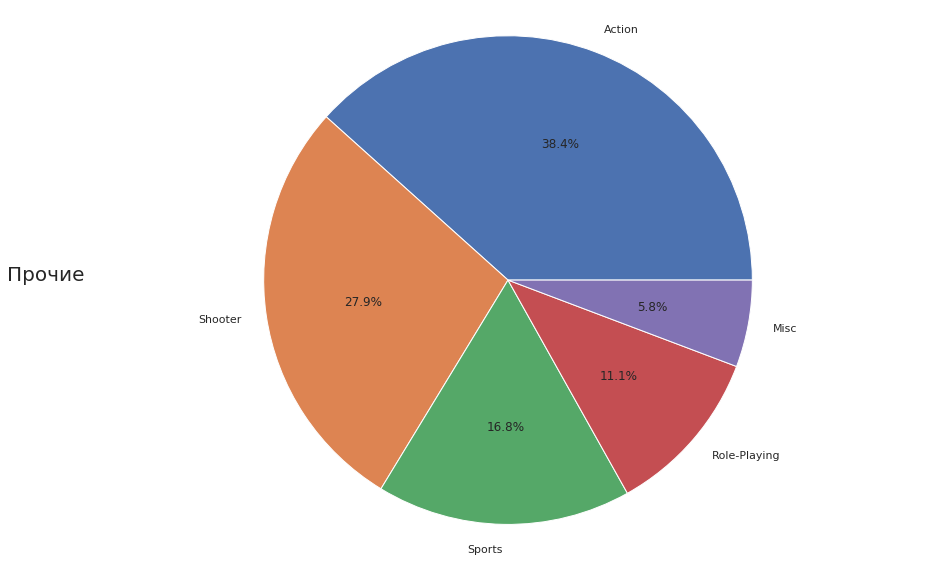

In [40]:
#Other
fig1, ax1 = plt.subplots()
labels_other = 'Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc'
ax1.pie(other_genre, labels=labels_other, autopct='%1.1f%%')
ax1.axis('equal') 
plt.figtext(0.05, 0.5, 'Прочие', fontsize=20)

- в мире лидируют следующие жанры: Action - Shooter - Sports
- Япония как всегда выделяется: Shooter - не попал в топ, а Role-Playing- занимает 1 место по продажам
- Misc не удивительно, что попал в топ Японии, так как там высокая доля портативных платформ
- ситуация с Fighting в JP объясняется спецификой рынка игр Японии

### Влияние рейтинга ESRB на продажи

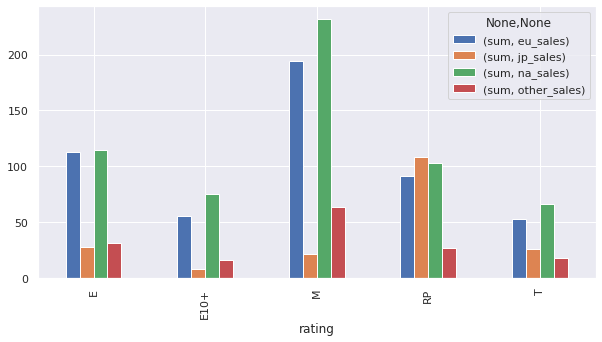

In [41]:
actual.pivot_table(index=['rating'], values=['eu_sales', 'jp_sales', 'na_sales', 'other_sales'],
                   aggfunc=[sum]).plot(kind='bar', figsize = (10,5))


- с одной стороны мы видим что рейтинг M (Mature) и Е (Everyone) влияет на продажи, но с другой стороны, подавляющее большинство пользователей старше 6 лет (минимальный возраст при рейтинге E) - так что я не стал бы обращать внимание на эти данные, так как нет явной прямой зависимости.
- высокая доля рейтинга RP (Rating Pending) в Японии объясняется, тем что в данном регионе применяется в основном собственный рейтинг для игр - CERO

### Выводы
- Япония является особенным рынком со своей внутренней спецификой
- в остальном мире портрет пользователя довольно схож:
    - предпочитает платформы Sony (PS3 и PS4)
    - предпочитает жанры  Action, Shooter, Sports
    - предпочитают игры с высоким возрастным рейтингом

## Гипотезы

### Средние пользовательские рейтинги Xbox One и PC одинаковые

Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые  
Альтернативная гипотеза : средние пользовательские рейтинги платформ Xbox One и PC отличаются

In [42]:
actual=actual[actual['critic_score'] > 0]  
actual=actual[actual['user_score'] > 0]

alpha=0.5
results_one = st.ttest_ind(actual.query('platform == "XOne"')['user_score'],
                           actual.query('platform == "PC"')['user_score'], equal_var=False)
print('P-значение: ', results_one.pvalue)
if results_one.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

actual['critic_score'].unique()

P-значение:  0.5926561176517491
Не получилось отвергнуть нулевую гипотезу


array([97, 83, 73, 78, 87, 71, 88, 82, 85, 74, 86, 95, 76, 93, 84, 81, 90,
       77, 80, 92, 70, 72, 79, 75, 91, 66, 89, 67, 57, 68, 65, 55, 63, 54,
       61, 94, 33, 64, 60, 69, 59, 52, 96, 53, 62, 48, 50, 32, 43, 56, 34,
       58, 47, 46, 31, 49, 40, 39, 51, 36, 23, 45, 42, 38, 24, 19, 44, 20,
       25, 35, 13, 37, 26])

### Средние пользовательскте рейтинги жанров Action и Sports разные

Нулевая гипотеза: средние пользовательские рейтинги жанров Action ( и Sports одинаковые  
Альтернативна гипотеза: средние пользовательские рейтинги жанров Action и Sports разные

In [43]:
alpha=0.5
results_two = st.ttest_ind(actual.query('genre == "Action"')['user_score'],
                           actual.query('genre == "Sports"')['user_score'], equal_var=False)
print('P-значение: ', results_two.pvalue)
if results_two.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

P-значение:  8.926417011727624e-14
Отвергаем нулевую гипотезу


### Выводы
- Гипотеза 1: дисперсии не равны, поэтому установим equal_var=False, нулевая гипотеза не подтвердилась. Делаем вывод, что средние пользовательские рейтинги платформ Xbox One и PC отличаются
- Гипотеза 2: дисперсии не равны, поэтому установим equal_var=False, нулевая гипотеза не подтвердилась. Делаем вывод, что средние пользовательские рейтинги жанров Action и Sports разные.

## Общий вывод
- исходя из полученных данных, определили, какие данные привести к нужным типам и какие ошибки нужно исправить
- заменили пропуски на 0 в Critic_Score и User_Score, а не на среднюю или медиану, так как на не известна причина отсутствия данных в этих столбцах и для избежания ненужных выбросов в данных
- основные причины появления NaN в Raiting - это выход игры до 1994 года (даты появляения первых рейтингов ESRB) и малые продажи (что может говорить о демо-версии игры и в связи с этим отстуствием выставленного рейтинга)
- заменили рейтинг К-А на Е в связи с тем что это один и тот же рейтинг, просто с более старым обозначением
- в User_Score заменили значение tbd (To be determined - будет определено позже) на 0, так как рейтинг еще не определен
- более 80% всех игр было выпущено после 2002 года
- пик продаж приходится на 2008-2011 годы
- срок активной "жизнедеятельности" платформы составляет 6-8 лет, после чего ее сменяет другая
- пики продаж приходятся на 4-5 год с момента старта продаж игр для платформы
- из общей картины выбиваются PC - по причине отличия платформы от прочих, т.к. это персональные компьютеры, а остальные платформы это в основном консоли.
- на топ-5 платформ приходиться 55% всех продаж, на топ-10 - более 75%.
- лидирующие позиции по продажам в последние годы занимает жанр Action, с большим отрывом от него идет жанр Shooter, жанры RolePlay и Sports по продажам примерно одинаковые и занимают 3-место
- все остальные жанры продаются слабо. Общая доля продаж прочих жанров окло 23%
- Япония является особенным рынком со своей внутренней спецификой
- в остальном мире портрет пользователя довольно схож:
    - предпочитает платформы Sony (PS3 и PS4)
    - предпочитает жанры Action, Shooter, Sports
    - предпочитают игры с высоким возрастным рейтингом
- средние пользовательские рейтинги платформ Xbox One и PC отличаются
- средние пользовательские рейтинги жанров Action и Sports разные.
- принимая во внимание, что за 2016 год у нас могут быть неполные данные и исходя из вышеприведенной информации, можно сделать вывод, что потенциально прибыльные платформы в 2017 году, это:
    - среди консолей PS4 и XOne (наблюдается рост последние несколько лет, пика еще не достигли)
    - среди портативных консолей PSV (идет спад спроса, но не резкий)
    - PC (волнообразный постоянный спрос)
- в ассортиментной политике стоит сделать упор на продаваемые жанры: Action, Shooter, RolePlay и Sports